Import all required libraries
=============================

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.optimizers import Adam

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
for x in os.listdir("../input"): print(x)

# Any results you write to the current directory are saved as output.

.ipynb_checkpoints
sample_submission.csv
test.csv
train.csv


Load Train and Test data
========================

In [2]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("../input/train.csv")
test= pd.read_csv("../input/test.csv")

In [3]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [4]:
# Convert train datset to (num_images, img_rows, img_cols, colour_channel_gray) format
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Preprocessing the digit images
==============================

Feature Standardization
-----------------------

In [5]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

One Hot encoding of labels
--------------------------

In [6]:
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

Designing Neural Network Architecture
=====================================

In [7]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

Cross Validation
----------------

In [8]:
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

Data Augmentation
-----------------

In [9]:
batch_size = 64
gen = ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, y_val, batch_size=batch_size)

Adding Batch Normalization
--------------------------

In [10]:
def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
model= get_bn_model()
model.optimizer.lr=0.001
history=model.fit(batches, steps_per_epoch=len(batches), epochs=30,
                    validation_data=val_batches, validation_steps=val_batches.n//batch_size)

Epoch 1/30
591/591 [==============================] - 76s 126ms/step - loss: 0.1105 - accuracy: 0.9659 - val_loss: 0.0467 - val_accuracy: 0.9856
Epoch 2/30
591/591 [==============================] - 74s 124ms/step - loss: 0.0419 - accuracy: 0.9864 - val_loss: 0.0503 - val_accuracy: 0.9856
Epoch 3/30
591/591 [==============================] - 70s 119ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0434 - val_accuracy: 0.9870
Epoch 4/30
591/591 [==============================] - 70s 118ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0372 - val_accuracy: 0.9892
Epoch 5/30
591/591 [==============================] - 69s 117ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0493 - val_accuracy: 0.9853
Epoch 6/30
591/591 [==============================] - 73s 123ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0486 - val_accuracy: 0.9870
Epoch 7/30
591/591 [==============================] - 68s 116ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0505 - val_ac

In [12]:
history_dict = history.history

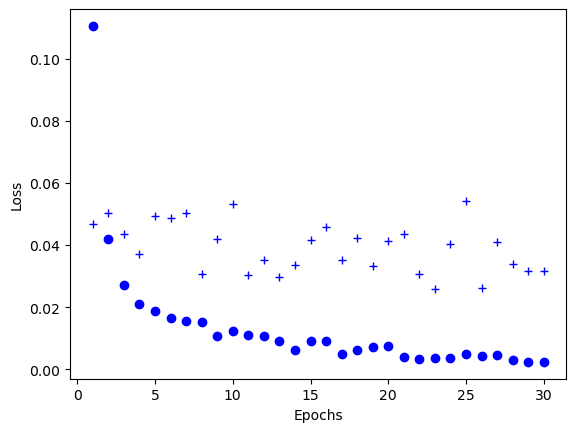

In [13]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

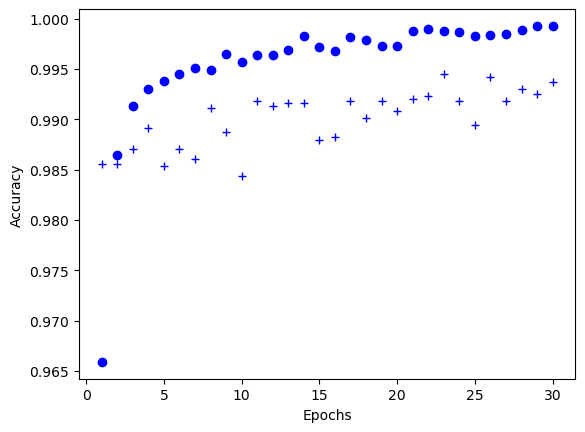

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

Validated model
---------------

In [15]:
model.optimizer.lr = 0.001
batch_size = 64
gen = ImageDataGenerator()
batches = gen.flow(X, y, batch_size=batch_size)
history = model.fit(batches, steps_per_epoch=len(batches), epochs=30)

Epoch 1/50
657/657 [==============================] - 76s 116ms/step - loss: 0.0124 - accuracy: 0.9968
Epoch 2/50
657/657 [==============================] - 85s 129ms/step - loss: 0.0042 - accuracy: 0.9985
Epoch 3/50
657/657 [==============================] - 82s 125ms/step - loss: 0.0031 - accuracy: 0.9989
Epoch 4/50
657/657 [==============================] - 78s 119ms/step - loss: 0.0022 - accuracy: 0.9991
Epoch 5/50
657/657 [==============================] - 86s 131ms/step - loss: 0.0029 - accuracy: 0.9989
Epoch 6/50
657/657 [==============================] - 82s 124ms/step - loss: 0.0037 - accuracy: 0.9989
Epoch 7/50
657/657 [==============================] - 82s 126ms/step - loss: 0.0033 - accuracy: 0.9989
Epoch 8/50
657/657 [==============================] - 83s 126ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 9/50
657/657 [==============================] - 83s 126ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 10/50
657/657 [==============================] - 83s 126ms/step - l

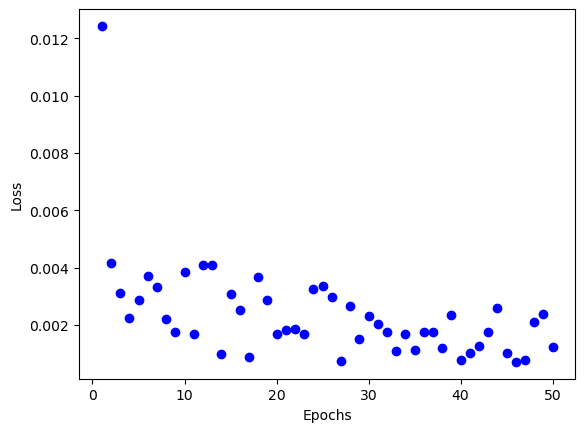

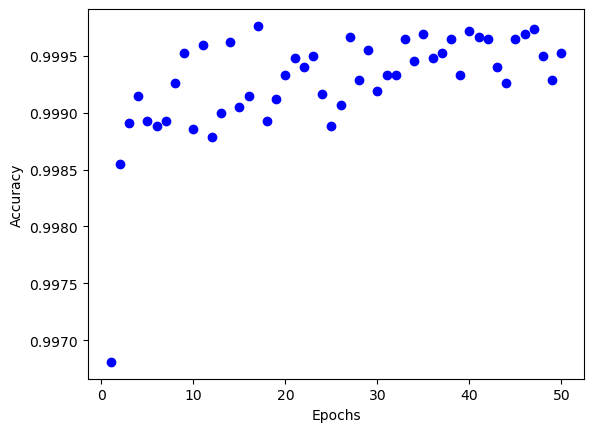

In [18]:
history_dict = history.history

loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

Tests
-----

In [16]:
predictions = model.predict(X_test, verbose=0)
predictions = np.argmax(predictions, axis=1)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("../DR.csv", index=False, header=True)

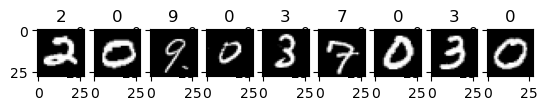

In [38]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_test = X_test.reshape(X_test.shape[0], 28, 28)

for i in range(9):
    plt.subplot(1,9,i+1)
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
    plt.title(predictions[i])